### Install Libraries

In [1]:
!pip3 install tqdm
!pip3 install transformers
!pip3 install plotly
!pip3 install p_tqdm

     |████████████████████████████████| 1.8MB 4.8MB/s 
     |████████████████████████████████| 2.9MB 28.3MB/s 
     |████████████████████████████████| 890kB 20.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=65697ac1a6aa84ac9b0074b4389d1be4a8ef101988978d91ad0b63f4b743fe05
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 81kB 2.7MB/s 
     |████████████████████████████████| 71kB 4.3MB/s 
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-cp36-none-any.whl size=3989 sha256=276f02cbfbe32b008e2e5e22713e84522d708d0fbcd0a8c19f413f40ddb03de6
  Stored in directory: /root/.cache/pip/wheels/72/26/f7/18d7dcd10ebd3f81fab3f52e07c61b5771cd21c29f69c7a0e9
Successfully built p-tqdm


In [2]:
import os
import numpy as np
import pandas as pd
import collections
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import ast
from tqdm import tqdm
from fastprogress.fastprogress import master_bar, progress_bar
import tensorflow as tf
import transformers
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')
import seaborn as sns

%matplotlib inline

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

print("TF Version: ", tf.__version__)

TF Version:  2.4.0


### Load TPUs

In [3]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.110.190.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.110.190.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


### Loading data

In [6]:
uncert=pd.read_csv('/content/FilteredCaseAPNotes.csv')
cert=pd.read_csv('/content/FilteredControlAPNotes.csv')

In [7]:
uncert['target']=0
uncert.head()

,Unnamed: 0,Unnamed: 0.1,PAT_ID,PAT_MRN_ID,NOTE_DATE,HOSP_ADMSN_TIME,UD_FLAG_RECORDED_TIME,PAT_ENC_CSN_ID,NOTE_ID,AUTHOR,AUTHOR_TEAM,AUTHOR_TYPE,NOTE_TYPE,NOTE_TEXT,AP,AP2,AP3,semtypes,preferred_names,target
0,0,0.0,Z1921305,11689451.0,YYYY-00-DD 00:00:SS,YYYY-49-DD 21:49:SS,YYYY-05-DD 18:05:SS,545493441.0,990325239.0,"HUBBELL, BRITTANY BELCASTRO",Hospital Medicine,Attending,Progress Notes,Brief Hospitalist Note Interval eval of pat...,A / P - Pain appears to be well controlled at...,NaN,NaN,"{'Sign or Symptom': 5, 'Disease or Syndrome': ...","['Arthralgia[42.15]', 'Exanthema[41.24]', 'Pai...",0
1,1,1.0,Z1912367,11680511.0,YYYY-00-DD 00:00:SS,YYYY-15-DD 16:15:SS,YYYY-05-DD 01:05:SS,545419450.0,988721487.0,"AL HNAWI, HAZEM",Hospital Medicine,Attending,Progress Notes,I evaluated the patient with APRN Lauren Shann...,"A / P Patient is improving,hence will contin...",NaN,NaN,"{'Antibiotic,Organic Chemical': 1, 'Plant': 1,...","['Nafcillin[25.53]', 'Arecaceae[22.43]', 'Emai...",0
2,2,2.0,Z609077,1238149.0,YYYY-00-DD 00:00:SS,YYYY-30-DD 07:30:SS,YYYY-53-DD 03:53:SS,544394982.0,972165591.0,"MALLORY, MIA LYNN",Hospital Medicine,Attending,Progress Notes,I have seen and evaluated this patient on 1/26...,A / P 17 y.o. with diffuse abdominal pain and ...,NaN,NaN,"{'Sign or Symptom': 4, 'Body Part, Organ, or O...","['Pain[35.81]', 'Appendix[20.95]', 'Mother (pe...",0
3,3,3.0,Z1132231,11104481.0,YYYY-00-DD 00:00:SS,YYYY-17-DD 17:17:SS,YYYY-40-DD 20:40:SS,542977195.0,949943500.0,"MALLORY, MIA LYNN",Hospital Medicine,Attending,Progress Notes,I have seen and evaluated this patient on 10/1...,A / P 9 y.o. complex medical history with pyel...,NaN,NaN,"{'Sign or Symptom': 3, 'Disease or Syndrome': ...","['Seizures[49.48]', 'Pyelonephritis[45.15]', '...",0
4,4,4.0,Z1132231,11104481.0,YYYY-00-DD 00:00:SS,YYYY-17-DD 17:17:SS,YYYY-40-DD 20:40:SS,542977195.0,949999500.0,"MALLORY, MIA LYNN",Hospital Medicine,Attending,Progress Notes,I have seen and evaluated this patient on 10/1...,A / P 9 y.o. with fever presumed pyelonephriti...,NaN,NaN,"{'Functional Concept': 5, 'Disease or Syndrome...","['Etiology[26.16]', 'Pyelonephritis[24.11]', '...",0


In [8]:
cert['target']=1
cert.head()

,Unnamed: 0,Unnamed: 0.1,PAT_MRN_ID,NOTE_ID,PROV_NAME,PROV_DEPT,SPECIALTY,AUTH_SERVICE,PROV_TYPE,NOTE_TIME,NOTE_TYPE,NOTE_TEXT,String,AP,Unnamed: 12,semtypes,preferred_names,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,target
0,0,0,1002009,905881733,"JOHNSON, TASHA MONIQUE",CCM GEN/COMMUN PEDS,PEDIATRIC PRIMARY CARE,Hospital Medicine,Attending,YYYY-18-DD 16:18:SS,Progress Note,Cincinnati Children's Hospital Medical Center ...,Assessment & Plan,Assessment & Plan: Angela Grace Famera is a(...,NaN,"{'Health Care Activity': 9, 'Qualitative Conce...","['Patient Discharge[49.24]', 'Needs[44.63]', '...",NaN,NaN,NaN,NaN,1
1,1,1,1002009,905381012,"CLARKSTON, KATHRYN E.",HOP HOPPLE ST HEALTH,PEDIATRICS,Hospital Medicine,Fellow,YYYY-18-DD 01:18:SS,HP Note,Cincinnati Children's Hospital Medical Center ...,Assessment and Plan,Assessment and Plan Angela is a 18 y.o. femal...,Assessment & Plan,"{'Amino Acid, Peptide, or Protein,Biologically...","['Gluten[39.09]', 'Pain[35.81]', 'Celiac Disea...",NaN,NaN,NaN,NaN,1
2,2,2,1013087,951660680,"WARNER, DANE CHRISTIAN",NaN,GIS HM,Hospital Medicine,Attending,YYYY-35-DD 12:35:SS,HP Note,Cincinnati Children's Hospital Medical Center ...,Assessment,Assessment: Luke is a 17 yr old male who prese...,Assessment and Plan,"{'Organic Chemical,Pharmacologic Substance': 4...","['Flagyl[58.70]', 'Diarrhea[53.97]', 'Abdomina...",NaN,NaN,NaN,NaN,1
3,3,3,1013087,951711153,"YOUNTS, ANGELA",NaN,GIS HM,Hospital Medicine,Nurse Practitioner,YYYY-10-DD 15:10:SS,Progress Note,Cincinnati Children's Hospital Medical Center ...,Assessment,Assessment: Luke is a 17 yr old male admitted ...,ASSESSMENT and PLAN,"{'Sign or Symptom': 8, 'Organic Chemical,Pharm...","['Pain[50.38]', 'Oxycodone[45.08]', 'Abdominal...",NaN,NaN,NaN,NaN,1
4,4,4,1013967,996856060,"HOLLOWAY, CHRISTOPHER KEITH",NaN,NaN,Hospital Medicine,Resident,YYYY-28-DD 05:28:SS,HP Note,Cincinnati Children's Hospital Medical Center ...,Assessment,Assessment: Shelby is a 19 y.o. female with a...,ASSESSMENT,"{'Organic Chemical,Pharmacologic Substance': 2...","['Acetaminophen[32.82]', 'Electrocardiogram[32...",NaN,NaN,NaN,NaN,1


In [9]:
data=pd.concat([uncert,cert],axis=0).reset_index() #concatenating

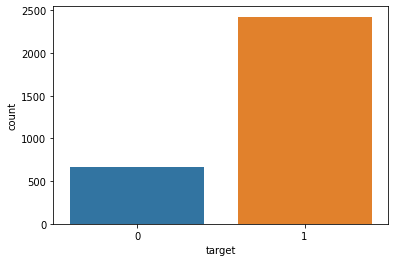

In [10]:
sns.countplot(data['target'])

In [12]:
# data['AP']=data['title'].str.lower()+'. '+data['text'].str.lower() #combining title and text fields

### Splitting train and test

In [18]:
from sklearn.model_selection import train_test_split
X=data['AP'].astype(str).values
y=data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42)

### Word distribution

In [19]:
news_lens=data['AP'].apply(lambda x: len(str(x).split()))
def mean(l):
  return sum(l)/len(l)
def median(l):
  return l[len(l)//2]
mins,maxs,means,medians=[],[],[],[]
for func in [news_lens]:
  mins.append(min([x for x in func if x!=1]))
  maxs.append(max(func))
  means.append(mean(func))
  medians.append(median(func))
pd.DataFrame([mins,maxs,means,medians], index=['Min','Max','Mean','Median'],columns=['text']).T

,Min,Max,Mean,Median
text,2.0,3156.0,337.454722,349.0


### Tokenizer

In [20]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [21]:
MAX_SEQ_LENGTH=512
def create_bert_input_features(docs, max_seq_length=MAX_SEQ_LENGTH):
    
    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm(docs, desc='Converting Docs to features'):
        tokens = tokenizer.tokenize(doc)
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        ids = tokenizer.convert_tokens_to_ids(tokens)
        masks = [1] * len(ids)
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
        segments = [0] * max_seq_length
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)
    encoded = np.array([all_ids, all_masks, all_segments])
    return encoded

In [22]:
train_features_ids, train_features_masks, train_features_segments,test_features_ids, test_features_masks, test_features_segments={},{},{},{},{},{}

mb=['AP']

for text in mb:
  train_features_ids[text], train_features_masks[text], train_features_segments[text] =create_bert_input_features(X_train.tolist())

  test_features_ids[text], test_features_masks[text], test_features_segments[text] = create_bert_input_features(X_test.tolist())



Converting Docs to features: 100%|██████████| 1021/1021 [00:11<00:00, 92.73it/s]


### Building Model

In [23]:
maxlength=512
with strategy.scope():
    inp_id = tf.keras.layers.Input(shape=(maxlength,), dtype='int32', name="bert_input_ids")
    inp_mask = tf.keras.layers.Input(shape=(maxlength,), dtype='int32', name="bert_input_masks")
    inp_segment = tf.keras.layers.Input(shape=(maxlength,), dtype='int32', name="bert_segment_ids")
    inputs = [inp_id, inp_mask, inp_segment] 

    hidden_state = transformers.TFBertModel.from_pretrained("bert-base-uncased")(inputs)
    pooled_output = hidden_state[1]
    output = tf.keras.layers.Dense(2, activation='softmax')(pooled_output)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
                                              epsilon=1e-08), 
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fc4ed7b6d90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).WARNING:tensorflow:AutoGraph could not transform <bound method Socket.send of <zmq.sugar.socket.Socket object at 0x7fc4cfe075f8>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fc4ed7b6d90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7fc4ed7b6d90> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
bert_input_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert_input_masks (InputLayer)   [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert_segment_ids (InputLayer)   [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 

### Training

In [24]:
batch_size=6
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                      patience=1,
                                      restore_best_weights=True)
model.fit([train_features_ids[text], 
          train_features_masks[text], 
          train_features_segments[text]], y_train, 
          epochs=2,
          batch_size=batch_size,
          validation_split=0.15,
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


294/294 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.7682

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


294/294 [==============================] - 111s 136ms/step - loss: 0.5069 - accuracy: 0.7683 - val_loss: 0.3357 - val_accuracy: 0.8746
Epoch 2/2
294/294 [==============================] - 33s 112ms/step - loss: 0.2918 - accuracy: 0.8677 - val_loss: 0.2634 - val_accuracy: 0.9132


### Prediction

In [25]:
test_pred=model.predict([test_features_ids[text], test_features_masks[text],  test_features_segments[text]])

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [26]:
y_pred=[x.index(max(x)) for x in test_pred.tolist()]

### Accuracy

In [27]:
import sklearn
accuracy=sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy

0.8560235063663075